### General Code

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests

from nltk.stem import WordNetLemmatizer # A class from nltk that provides methods for lemmatizing words.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Download necessary NLTK data files
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
train_df = pd.read_json('train.json')
print(train_df.shape)
train_df.head()

(7401, 2)


,reviews,sentiments
0,I bought this belt for my daughter in-law for ...,1
1,The size was perfect and so was the color. It...,1
2,"Fits and feels good, esp. for doing a swim rac...",1
3,These socks are absolutely the best. I take pi...,1
4,Thank you so much for the speedy delivery they...,1


In [ ]:
train_df.sentiments.value_counts()

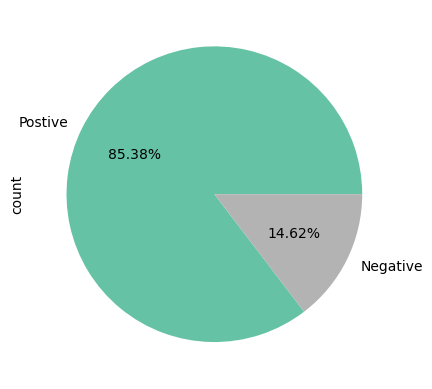

In [5]:
train_df['sentiments'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=['Postive','Negative'],cmap='Set2')
plt.show()

In [6]:
test_df = pd.read_json('test.json')
print(test_df.shape)
test_df.head()

(1851, 1)


,reviews
0,I bought 2 sleepers. sleeper had holes in the...
1,I dare say these are just about the sexiest th...
2,"everything about the transaction (price, deliv..."
3,"Not bad for just a shirt. Very durable, and m..."
4,These are truly wrinkle free and longer than t...


### TF-IDF

In [8]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(lemmatized_words)

In [9]:
# Apply lemmatization to the 'reviews' column
train_df['lemmatized_reviews'] = train_df['reviews'].apply(lemmatize_text)
train_df.head()

,reviews,sentiments,lemmatized_reviews
0,I bought this belt for my daughter in-law for ...,1,I bought belt daughter in-law Christmas loved
1,The size was perfect and so was the color. It...,1,The size perfect color. It looked like web page:)
2,"Fits and feels good, esp. for doing a swim rac...",1,"Fits feel good, esp. swim race. Highly recomme..."
3,These socks are absolutely the best. I take pi...,1,These sock absolutely best. I take pilate clas...
4,Thank you so much for the speedy delivery they...,1,Thank much speedy delivery came time rehearsal...


##### Vectorizing lemmatized Train data

In [11]:
vectorizer = TfidfVectorizer()
X_train_lemmatized = vectorizer.fit_transform(train_df['lemmatized_reviews'])
X_train_lemmatized = vectorizer.transform(train_df['lemmatized_reviews'])
X_train_lemmatized.shape

(7401, 13637)

##### 1. TF-IDF Matrix

The TF-IDF matrix is a sparse matrix where each row represents a document (review) and each column represents a term from the vocabulary. The values in this matrix are the TF-IDF scores.

what is a sparse matrix: A sparse matrix is a type of matrix in which the majority of elements are zero
Sparse Representation: When you transform text data into TF-IDF features using a tool like TfidfVectorizer, you often end up with a sparse matrix. This is because each document typically contains only a small fraction of the total vocabulary, leading to many terms having a TF-IDF score of zero.

In [13]:
# Convert the sparse matrix to a dense format for inspection
dense_matrix = X_train_lemmatized.todense()

# Convert to a DataFrame for better readability
tfidf_df = pd.DataFrame(dense_matrix, columns=vectorizer.get_feature_names_out())

# Display the first few rows of the DataFrame
print(tfidf_df.head())

    00  000  00am  00ca   01  040   05   06   07   09  ...  zipped    zipper  \
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   
2  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.107614   
3  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   
4  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   

   zippered  zippers  zipping  zips  zoo  zoology  zoom  zyliss  
0       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
1       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
2       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
3       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
4       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  

[5 rows x 13637 columns]


##### 2. Display Vocabulary

The vocabulary is a mapping of terms to feature indices. You can print a portion of it to understand which terms are included.
Vocabulary Display is about understanding what words are included as features.

In [15]:
# Get the vocabulary
vocabulary = vectorizer.vocabulary_

# Display the first 10 items in the vocabulary
print("First 10 terms in the vocabulary:")
for i, (term, index) in enumerate(vocabulary.items()):
    if i < 10:
        print(f"{term}: {index}")
    else:
        break

First 10 terms in the vocabulary:
bought: 1754
belt: 1471
daughter: 3339
in: 6218
law: 6912
christmas: 2435
loved: 7237
the: 12091
size: 10809
perfect: 8755


##### 3. Visualize Top Features
To understand which features have the highest importance (TF-IDF scores), you can sum up TF-IDF scores across all documents and sort them.
Top Features focus on determining which of those words are most influential based on their TF-IDF scores.

In [17]:
import numpy as np

# Sum up the TF-IDF scores for each term across all documents
tfidf_scores = np.array(X_train_lemmatized.sum(axis=0)).flatten()

# Create a dictionary of terms and their corresponding scores
term_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_scores))

# Sort terms by their scores in descending order and display top 5
sorted_terms = sorted(term_scores.items(), key=lambda item: item[1], reverse=True)
print("Top 5 terms with highest TF-IDF scores:")
for term, score in sorted_terms[:5]:
    print(f"{term}: {score}")

Top 5 terms with highest TF-IDF scores:
great: 219.5061578868765
the: 218.93955407895075
it: 216.46192513614352
shoe: 213.4140427255419
they: 184.74937218288167


#### Vectorizing Raw Train data

In [19]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['reviews'])
X_train = vectorizer.transform(train_df['reviews'])
X_train.shape

(7401, 14114)

In [20]:
# Displaying TF-IDF outputs

##### 1. TF-IDF Matrix

In [22]:
# Convert the sparse matrix to a dense format for inspection
dense_matrix = X_train.todense()

# Convert to a DataFrame for better readability
tfidf_df = pd.DataFrame(dense_matrix, columns=vectorizer.get_feature_names_out())

# Display the first few rows of the DataFrame
print(tfidf_df.head())

    00  000  00am  00ca   01  040   05   06   07   09  ...  zipped    zipper  \
0  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   
1  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   
2  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.101372   
3  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   
4  0.0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.000000   

   zippered  zippers  zipping  zips  zoo  zoology  zoom  zyliss  
0       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
1       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
2       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
3       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  
4       0.0      0.0      0.0   0.0  0.0      0.0   0.0     0.0  

[5 rows x 14114 columns]


##### 2. Display Vocabulary

In [24]:
# Get the vocabulary
vocabulary = vectorizer.vocabulary_

# Display the first 10 items in the vocabulary
print("First 10 terms in the vocabulary:")
for i, (term, index) in enumerate(vocabulary.items()):
    if i < 10:
        print(f"{term}: {index}")
    else:
        break

First 10 terms in the vocabulary:
bought: 1802
this: 12574
belt: 1506
for: 5206
my: 8142
daughter: 3450
in: 6423
law: 7127
christmas: 2501
and: 877


##### 3. Visualize Top Features

In [26]:
import numpy as np

# Sum up the TF-IDF scores for each term across all documents
tfidf_scores = np.array(X_train.sum(axis=0)).flatten()

# Create a dictionary of terms and their corresponding scores
term_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_scores))

# Sort terms by their scores in descending order and display top 5
sorted_terms = sorted(term_scores.items(), key=lambda item: item[1], reverse=True)
print("Top 5 terms with highest TF-IDF scores:")
for term, score in sorted_terms[:5]:
    print(f"{term}: {score}")

Top 5 terms with highest TF-IDF scores:
the: 643.1187240238644
and: 475.92626283779913
it: 409.2880280488784
to: 354.87421162765844
is: 322.41149992760626


#### Lematizing Test data

In [28]:
test_df['lemmatized_reviews'] = test_df['reviews'].apply(lemmatize_text)
test_df.head()

,reviews,lemmatized_reviews
0,I bought 2 sleepers. sleeper had holes in the...,I bought 2 sleepers. sleeper hole arm pit area...
1,I dare say these are just about the sexiest th...,I dare say sexiest thing I've ever worn. Oh I'...
2,"everything about the transaction (price, deliv...","everything transaction (price, delivery time, ..."
3,"Not bad for just a shirt. Very durable, and m...","Not bad shirt. Very durable, matched team colo..."
4,These are truly wrinkle free and longer than t...,These truly wrinkle free longer average woman ...


### Pretrained Word Embeddings Model

#### 1. Word2Vec

In [31]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings ('ignore')

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [32]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [33]:
train_df_W2V = pd.read_json('train.json')
train_df_W2V.head()

,reviews,sentiments
0,I bought this belt for my daughter in-law for ...,1
1,The size was perfect and so was the color. It...,1
2,"Fits and feels good, esp. for doing a swim rac...",1
3,These socks are absolutely the best. I take pi...,1
4,Thank you so much for the speedy delivery they...,1


In [34]:
train_df_W2V['t_reviews'] = train_df_W2V['reviews'].apply(word_tokenize)
train_df_W2V.head()

,reviews,sentiments,t_reviews
0,I bought this belt for my daughter in-law for ...,1,"[I, bought, this, belt, for, my, daughter, in-..."
1,The size was perfect and so was the color. It...,1,"[The, size, was, perfect, and, so, was, the, c..."
2,"Fits and feels good, esp. for doing a swim rac...",1,"[Fits, and, feels, good, ,, esp, ., for, doing..."
3,These socks are absolutely the best. I take pi...,1,"[These, socks, are, absolutely, the, best, ., ..."
4,Thank you so much for the speedy delivery they...,1,"[Thank, you, so, much, for, the, speedy, deliv..."


In [35]:
trainW2V = Word2Vec(train_df_W2V['t_reviews'], min_count=1)

In [36]:
print (trainW2V)

Word2Vec<vocab=19195, vector_size=100, alpha=0.025>


In [37]:
words = list(trainW2V.wv.key_to_index)
print(len(words))

19195


In [38]:
print (words)

['.', 'I', 'the', ',', 'and', 'a', 'to', 'is', 'it', 'for', 'of', 'in', 'are', 'my', 'that', 'this', '!', 'was', 'them', 'you', 'they', 'have', 'on', 'with', 'The', 'but', 'not', 'these', 'very', "n't", "'s", 'so', 'as', 'great', 'It', 'be', 'They', 'shoes', 'comfortable', 'like', 'size', 'wear', ')', '(', 'would', 'at', 'just', 'one', 'do', 'good', 'This', 'or', 'all', 'fit', 'well', 'had', 'me', 'your', 'more', 'bought', 'than', 'when', 'out', 'were', 'if', 'too', 'from', 'can', 'will', 'up', 'pair', "''", 'get', 'These', 'really', 'i', 'price', 'love', 'quality', 'look', 'only', 'shoe', 'am', 'time', '``', 'little', 'has', 'because', 'buy', '...', 'an', 'about', 'product', "'m", 'got', 'what', "'ve", '-', 'nice', 'did', 'other', 'My', 'no', 'made', 'bra', 'even', 'feet', 'ordered', 'which', 'much', 'wearing', 'also', 'after', 'back', 'been', 'does', 'color', 'could', 'some', 'feel', 'bag', 'perfect', 'use', 'first', 'find', "'re", 'looking', 'he', 'day', 'any', 'boots', 'now', 'reco

In [39]:
oneword = trainW2V.wv['to']
print (oneword)

[-0.22627003  0.4365024  -0.01371711  0.9254023  -0.5685391   0.00870926
  2.533404   -0.3666154  -1.6288807  -1.1724255   0.8962594  -0.15880243
  1.4084854  -0.9599065   0.9265983  -0.8472573   1.3853875  -1.5672411
 -0.02393246 -1.1924312   0.4622747  -0.0768759  -0.9116465  -0.5142596
  0.60448676 -0.26349744 -1.8660594   0.72620255  0.3833719  -0.73484856
  0.54099786  2.0066483  -1.1492519  -0.253692   -0.22085842  1.8345261
 -0.4350934  -0.9554944   0.0987682  -2.1071327   1.1426189  -0.76677674
  1.005212   -0.44363162  0.6038361   1.0227003  -0.7209487  -0.07634237
 -0.19502825  0.17914368  1.0243948  -1.0262475  -0.11057008  0.42580354
 -0.3370984  -0.13303812  0.7307077  -0.41991666 -0.8944682  -1.0427252
 -1.3281554  -0.7898112   1.5410217  -0.5925695  -0.6859841   1.1919328
 -0.23730011  0.13367745 -1.6482574  -0.04014823 -1.0277146   1.456872
  0.3785898   0.04878279  0.77842516 -0.44280618 -0.37435985  0.8350358
 -0.28351182  1.5128844  -0.6457586  -0.98275983 -0.7689493

In [40]:
trainW2V.wv.most_similar('supplier')

[('buyers', 0.9248312711715698),
 ('double', 0.9066688418388367),
 ('advise', 0.9044634699821472),
 ('fee', 0.904403030872345),
 ('strapless', 0.9029110670089722),
 ('NEVER', 0.9010002017021179),
 ('Steve', 0.8996089100837708),
 ('regarding', 0.8990191221237183),
 ('companies', 0.8980908393859863),
 ('Grey', 0.8962445259094238)]

In [41]:
word1 = 'supplier'
word2 = 'LOL'
similarity1 = trainW2V.wv.similarity(word1, word2)
print (similarity1)

0.7805186


In [42]:
word3 = 'Dress'
word4 = 'Free'
similarity2 = trainW2V.wv.similarity(word3, word4)
print (similarity2)

0.9350978


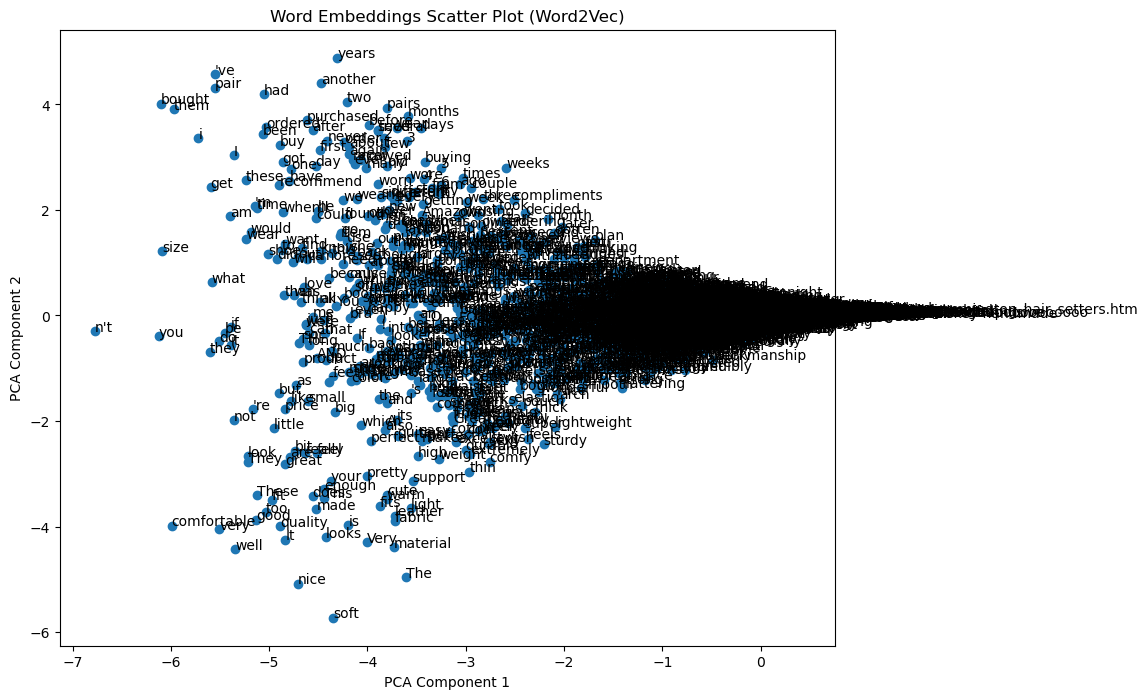

In [43]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(trainW2V.wv.vectors)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, word in enumerate(trainW2V.wv.index_to_key):
    plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings Scatter Plot (Word2Vec)")
plt.show()

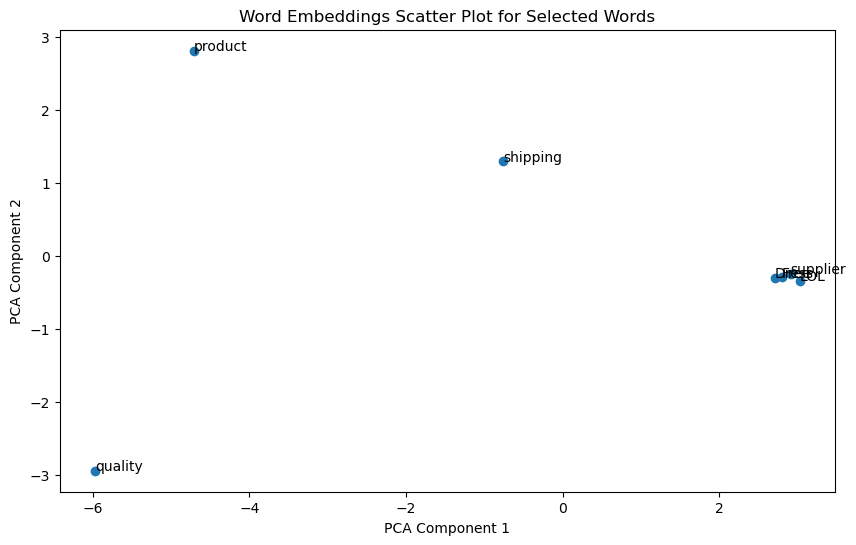

In [44]:
selected_words = ['supplier', 'Dress', 'Free', 'LOL', 'product', 'shipping', 'quality']

word_vectors = [trainW2V.wv[word] for word in selected_words if word in trainW2V.wv]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, word in enumerate(selected_words):
    if word in trainW2V.wv:
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Word Embeddings Scatter Plot for Selected Words")
plt.show()

#### 2. GloVe

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling1D, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

In [48]:
train_df_GloVe = pd.read_json('train.json')
train_df_GloVe.head()

,reviews,sentiments
0,I bought this belt for my daughter in-law for ...,1
1,The size was perfect and so was the color. It...,1
2,"Fits and feels good, esp. for doing a swim rac...",1
3,These socks are absolutely the best. I take pi...,1
4,Thank you so much for the speedy delivery they...,1


In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df_GloVe['reviews'])

word_index = tokenizer.word_index
word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'to': 5,
 'it': 6,
 'is': 7,
 'for': 8,
 'of': 9,
 'in': 10,
 'this': 11,
 'my': 12,
 'they': 13,
 'are': 14,
 'that': 15,
 'these': 16,
 'them': 17,
 'was': 18,
 'you': 19,
 'on': 20,
 'but': 21,
 'with': 22,
 'have': 23,
 'very': 24,
 'not': 25,
 'so': 26,
 'great': 27,
 'as': 28,
 'comfortable': 29,
 'be': 30,
 'shoes': 31,
 'like': 32,
 'size': 33,
 'good': 34,
 'wear': 35,
 'just': 36,
 'if': 37,
 'one': 38,
 'at': 39,
 'all': 40,
 'well': 41,
 'would': 42,
 'or': 43,
 'when': 44,
 'fit': 45,
 'had': 46,
 'your': 47,
 'me': 48,
 'bought': 49,
 'more': 50,
 'than': 51,
 'love': 52,
 'will': 53,
 'out': 54,
 'from': 55,
 'too': 56,
 'up': 57,
 'were': 58,
 'pair': 59,
 "it's": 60,
 'get': 61,
 'really': 62,
 'can': 63,
 'price': 64,
 'only': 65,
 'quality': 66,
 'look': 67,
 'shoe': 68,
 'am': 69,
 'no': 70,
 'buy': 71,
 'time': 72,
 'because': 73,
 'what': 74,
 'nice': 75,
 'little': 76,
 'has': 77,
 'also': 78,
 'an': 79,
 'product': 80,
 "

In [50]:
vocab_size = len(word_index)
vocab_size

14630

In [51]:
max(len(data) for data in train_df_GloVe['reviews'])

5525

In [52]:
sequences = tokenizer.texts_to_sequences(train_df_GloVe['reviews'])
padded_seq = pad_sequences(sequences, maxlen=5525, padding='post', truncating='post')

In [53]:
padded_seq[0]

array([ 2, 49, 11, ...,  0,  0,  0])

In [54]:
import urllib.request

url = "http://nlp.stanford.edu/data/glove.6B.zip"
output_path = "glove.6B.zip"

urllib.request.urlretrieve(url, output_path)
print("Download complete!")

Download complete!


In [55]:
import zipfile

# Path to the downloaded file
zip_path = "glove.6B.zip"

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("glove_data")  # This will extract files to a folder named 'glove_data'

print("Unzipping complete!")

Unzipping complete!


In [127]:
embedding_index = {}
with open('glove_data/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs
        
print("Embeddings loaded!")

Embeddings loaded!


In [129]:
embedding_index['supplier']

array([ 0.31247 ,  0.50776 ,  1.0438  ,  0.40066 ,  0.40521 , -1.61    ,
        0.26667 , -0.38857 ,  0.50556 ,  0.62261 , -0.10801 , -0.91885 ,
        0.62473 ,  0.36208 , -0.82393 , -0.41594 ,  0.90386 , -0.13532 ,
        0.48536 , -0.085534, -0.1835  , -0.052865,  0.27848 ,  0.31497 ,
        0.42557 ,  0.3925  ,  0.34785 ,  0.53337 ,  0.058389,  0.65004 ,
        0.19758 ,  0.10206 , -0.15183 , -0.54683 ,  0.31216 ,  0.89951 ,
        0.33976 , -0.22024 , -0.043202, -0.36272 ,  0.64255 ,  0.33957 ,
        0.54646 , -0.31716 , -0.22837 ,  0.28319 , -0.24685 ,  0.13801 ,
       -0.27105 , -0.32718 , -0.14277 ,  0.90985 , -0.6016  ,  0.43449 ,
        0.16282 , -0.41591 , -1.001   , -0.28833 ,  1.7091  , -0.11571 ,
        0.67422 , -1.2428  ,  0.15395 ,  0.44932 ,  0.37232 , -0.71367 ,
        0.27091 , -0.25524 ,  0.16894 , -0.004357, -0.052571,  0.22648 ,
       -0.15644 ,  0.011232,  0.59623 , -0.099011,  0.36153 , -0.71948 ,
       -0.57601 ,  0.58485 ,  0.78023 ,  0.012448, 

In [131]:
embedding_matrix = np.zeros ((vocab_size+1, 100))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [133]:
embedding_matrix.shape

(14631, 100)

#### Word Embedding with RNN - LSTM & GRU

##### 1. LSTM

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [155]:
from keras.layers import LSTM

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size+1, 100, weights=[embedding_matrix], input_length=5525, trainable=False)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

In [157]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     1,463,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,463,100 (5.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,463,100 (5.58 MB)

None


In [159]:
X = train_df_GloVe['reviews']
y = train_df_GloVe['sentiments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
print(X_train.dtypes)
print(y_train.dtypes)

object
int64


In [162]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=5525, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=5525, padding='post', truncating='post')

lstm_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - acc: 0.8083 - loss: 0.4970 - val_acc: 0.8682 - val_loss: 0.3899
Epoch 2/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - acc: 0.8588 - loss: 0.4092 - val_acc: 0.8682 - val_loss: 0.3927
Epoch 3/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - acc: 0.8510 - loss: 0.4230 - val_acc: 0.8682 - val_loss: 0.3949


In [164]:
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test)
y_pred = (lstm_model.predict(X_test_pad) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 607ms/step - acc: 0.8596 - loss: 0.4086
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 610ms/step
Test Accuracy: 85.89%
Validation Loss: 0.4098
Precision: 0.8589
Recall: 1.0000
F1 Score: 0.9241
Error Rate: 0.1411


##### 2. GRU

In [165]:
from keras.layers import GRU

gru_model = Sequential()
embedding_layer = Embedding(vocab_size+1, 100, weights=[embedding_matrix], input_length=5525, trainable=False)
gru_model.add(embedding_layer)
gru_model.add(GRU(128))
gru_model.add(Dense(1, activation='sigmoid'))

In [166]:
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(gru_model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     1,463,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,463,100 (5.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,463,100 (5.58 MB)

None


In [167]:
gru_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - acc: 0.8213 - loss: 0.5038 - val_acc: 0.8682 - val_loss: 0.3993
Epoch 2/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - acc: 0.8489 - loss: 0.4259 - val_acc: 0.8682 - val_loss: 0.3905
Epoch 3/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - acc: 0.8566 - loss: 0.4119 - val_acc: 0.8682 - val_loss: 0.3913


In [168]:
loss, accuracy = gru_model.evaluate(X_test_pad, y_test)
y_pred = (gru_model.predict(X_test_pad) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - acc: 0.8596 - loss: 0.4061
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 468ms/step
Test Accuracy: 85.89%
Validation Loss: 0.4074
Precision: 0.8589
Recall: 1.0000
F1 Score: 0.9241
Error Rate: 0.1411


###### 3. Hybrid LSTM & GRU

In [170]:
from keras.layers import GRU, LSTM, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [171]:
input_layer = Input(shape=(5525,))

In [172]:
embedding_layer_lstm = Embedding(vocab_size+1, 100, weights=[embedding_matrix], input_length=5525, trainable=False)(input_layer)
lstm_layer = LSTM(64)(embedding_layer_lstm)

In [173]:
embedding_layer_gru = Embedding(vocab_size+1, 100, weights=[embedding_matrix], input_length=5525, trainable=False)(input_layer)
gru_layer = GRU(64)(embedding_layer_gru)

In [174]:
merged_layer = concatenate([lstm_layer, gru_layer])

In [175]:
output_layer = Dense(1, activation='sigmoid')(merged_layer)

In [176]:
hybrid_model = Model(inputs=input_layer, outputs=output_layer)
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(hybrid_model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 5525)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 5525, 100) │  1,463,100 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 5525, 100) │  1,463,100 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 64)        │     42,240 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 64)        │     31,872 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ lstm_4[0][0],     │
│ (Concatenate)       │                   │            │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │        129 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,000,441 (11.45 MB)

 Trainable params: 74,241 (290.00 KB)

 Non-trainable params: 2,926,200 (11.16 MB)

None


In [177]:
hybrid_model.fit(X_train_pad, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 508s 3s/step - acc: 0.8189 - loss: 0.4995 - val_acc: 0.8682 - val_loss: 0.3897
Epoch 2/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 559s 4s/step - acc: 0.8519 - loss: 0.4215 - val_acc: 0.8682 - val_loss: 0.3897
Epoch 3/3
148/148 ━━━━━━━━━━━━━━━━━━━━ 570s 4s/step - acc: 0.8508 - loss: 0.4224 - val_acc: 0.8682 - val_loss: 0.3947


In [178]:
loss, accuracy = hybrid_model.evaluate(X_test_pad, y_test)
y_pred = (hybrid_model.predict(X_test_pad) > 0.5).astype("int32")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
error_rate = 1 - accuracy

print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Loss: {loss:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Error Rate: {error_rate:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 811ms/step - acc: 0.8596 - loss: 0.4085
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 622ms/step
Test Accuracy: 85.89%
Validation Loss: 0.4097
Precision: 0.8589
Recall: 1.0000
F1 Score: 0.9241
Error Rate: 0.1411


### Pretrained Language Model

#### 1. BERT (Bidirectional Encoder Representations from Transformers)

A language model by Google designed to understand word context by processing text bidirectionally. Built on the Transformer architecture, BERT learns rich, context-aware representations of words through a training approach called Masked Language Modeling, where it predicts missing words in sentences. Pre-trained on large text corpora, BERT can be fine-tuned for tasks like sentiment analysis and question-answering, making it versatile across various NLP applications.

In [1]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset  # Using Hugging Face's Dataset

In [2]:
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
def tokenize_function(examples):
    return tokenizer(examples['reviews'], padding='max_length', truncation=True, max_length=512)

In [4]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

In [5]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [6]:
train_dataset = train_dataset.rename_column("sentiments", "labels")

In [7]:
train_dataset

Dataset({
    features: ['reviews', 'labels'],
    num_rows: 7401
})

In [8]:
dataset_dict = train_dataset.train_test_split(test_size=0.125, seed=42, shuffle = True)
train_dataset = dataset_dict['train']
val_dataset = dataset_dict['test']

In [9]:
train_dataset_tk = train_dataset.map(tokenize_function, batched=True) #.map is used in data processing to apply a specified function to each element in a dataset or collection
val_dataset_tk = val_dataset.map(tokenize_function, batched=True)
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/6475 [00:00<?, ? examples/s]

Map:   0%|          | 0/926 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

In [10]:
training_args = TrainingArguments(
    output_dir="./results",
    logging_dir='./logs',
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [ ]:
#num_train_epochs: Default is 3
#per_device_train_batch_size: Default is 8
#per_device_eval_batch_size: Default is 8
#learning_rate: Default is 5e-5
#warmup_steps: Default is 0
#weight_decay: Default is 0.0
#lr_scheduler_type: Default is "linear"

In [12]:
# Load metrics using evaluate library
from evaluate import load

accuracy_metric = load("accuracy")
f1_metric = load("f1")
precision_metric = load("precision")
recall_metric = load("recall")

# Initialize an empty list to store misclassified samples
misclassified_samples = []

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    
    error_rate = 1 - accuracy["accuracy"]
    
    # Identify misclassified samples
    global misclassified_samples
    misclassified_samples = []  # Reset for each evaluation
    
    for idx, (pred, true_label) in enumerate(zip(predictions, labels)):
        if pred != true_label:
            # Retrieve original review text from val_dataset using index
            original_review = val_dataset[idx]['reviews']
            misclassified_samples.append({
                'index': idx,
                'review': original_review,
                'true_label': true_label.item(),
                'predicted_label': pred.item()
            })
            
    # Display the count of misclassified samples
    total_samples = len(labels)  # Total number of samples in this evaluation
    print(f"Number of misclassified samples: {len(misclassified_samples)} / {total_samples} ")
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "error_rate": error_rate,
    }

In [13]:
from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tk,
    eval_dataset=val_dataset_tk,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
)

In [14]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.262300,0.185845,0.943844,0.940150,0.942771,0.943844,0.056156
2,0.107900,0.162621,0.962203,0.962261,0.962323,0.962203,0.037797
3,0.036200,0.222751,0.955724,0.954146,0.954600,0.955724,0.044276


Number of misclassified samples: 52 / 926 
Number of misclassified samples: 35 / 926 
Number of misclassified samples: 41 / 926 


TrainOutput(global_step=2430, training_loss=0.13545873587023574, metrics={'train_runtime': 1581.3283, 'train_samples_per_second': 12.284, 'train_steps_per_second': 1.537, 'total_flos': 5110932250368000.0, 'train_loss': 0.13545873587023574, 'epoch': 3.0})

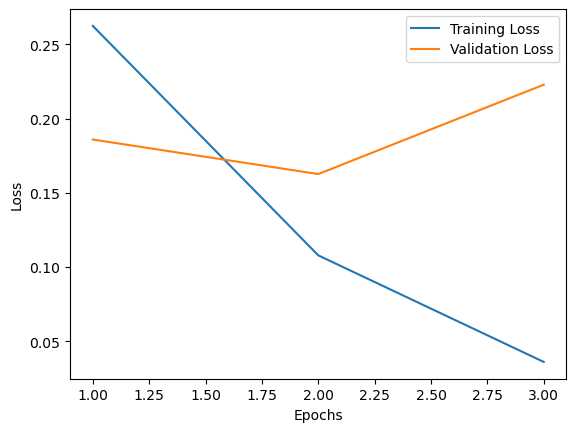

In [15]:
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
epochs = range(1, len(validation_loss) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, training_loss[:len(validation_loss)], label="Training Loss")  # Match length with validation
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [16]:
# Print or save misclassified samples after evaluation
for sample in misclassified_samples:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']}")

Index: 107, Review: I used to wear lame-ass Y-fronts when I was a kid and my boring folks did all the shopping. I made the switch to thongs after I got a girlfriend and she made it clear that I had to ditch the grandpa undies. So I did, and gladly! There's no way I could go back to this 'maxi' sh*t anymore. I tried one of my old pairs a few months ago and they look freakin HUGE!! I'm talking fat-guy big. You don't realize how big they are until you try modern stuff. So here's my advice: if you're still putting up with either boxers or briefs throw them in the trash right now and go buy something smaller. You'll be happy you did, True Label: 0, Predicted Label: 1
Index: 135, Review: I purchased a bathing suit using the sizing chart that the seller provided and it proved to be very inaccurate.  I purchased a size small based on the chart and it doesn't come close to fitting.  The suit is not exchangeable (since it is sold by a California merchant).  Now I am out of pocket and the suit do

#### 2. DistilBERT

A compact, faster version of BERT created through a process called knowledge distillation. It retains 97% of BERT’s language understanding but is 60% smaller and twice as fast. During training, DistilBERT learns to mimic BERT’s behavior, achieving a similar level of performance on various NLP tasks with significantly fewer parameters. This makes it ideal for applications needing BERT-like accuracy in environments with limited computational resources.

In [38]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset  # Using Hugging Face's Dataset

In [40]:
model_name = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

C:\Users\User\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
def tokenize_function(examples):
    return tokenizer(examples['reviews'], padding='max_length', truncation=True, max_length=512)

In [42]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

In [43]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [44]:
train_dataset = train_dataset.rename_column("sentiments", "labels")
train_dataset

Dataset({
    features: ['reviews', 'labels'],
    num_rows: 7401
})

In [45]:
dataset_dict = train_dataset.train_test_split(test_size=0.125, seed=42, shuffle=True)
train_dataset = dataset_dict['train']
val_dataset = dataset_dict['test']

In [46]:
train_dataset_tk = train_dataset.map(tokenize_function, batched=True)
val_dataset_tk = val_dataset.map(tokenize_function, batched=True)
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/6475 [00:00<?, ? examples/s]

Map:   0%|          | 0/926 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

In [47]:
training_args = TrainingArguments(
    output_dir="./results",
    logging_dir='./logs',
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

In [48]:
# Load metrics using evaluate library
from evaluate import load

accuracy_metric = load("accuracy")
f1_metric = load("f1")
precision_metric = load("precision")
recall_metric = load("recall")

# Initialize an empty list to store misclassified samples
misclassified_samples = []

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    
    error_rate = 1 - accuracy["accuracy"]
    
    # Identify misclassified samples
    global misclassified_samples
    misclassified_samples = []  # Reset for each evaluation
    
    for idx, (pred, true_label) in enumerate(zip(predictions, labels)):
        if pred != true_label:
            # Retrieve original review text from val_dataset using index
            original_review = val_dataset[idx]['reviews']
            misclassified_samples.append({
                'index': idx,
                'review': original_review,
                'true_label': true_label.item(),
                'predicted_label': pred.item()
            })
            
    # Display the count of misclassified samples
    total_samples = len(labels)  # Total number of samples in this evaluation
    print(f"Number of misclassified samples: {len(misclassified_samples)} / {total_samples} ")
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "error_rate": error_rate,
    }

In [49]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tk,
    eval_dataset=val_dataset_tk,
    compute_metrics=compute_metrics,
)

In [50]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.267100,0.194925,0.925486,0.915995,0.926951,0.925486,0.074514
2,0.121400,0.168290,0.949244,0.947990,0.947707,0.949244,0.050756
3,0.046100,0.247344,0.947084,0.945588,0.945345,0.947084,0.052916


Number of misclassified samples: 69 / 926 
Number of misclassified samples: 47 / 926 
Number of misclassified samples: 49 / 926 


TrainOutput(global_step=2430, training_loss=0.14486155882784368, metrics={'train_runtime': 841.4308, 'train_samples_per_second': 23.086, 'train_steps_per_second': 2.888, 'total_flos': 2573179218892800.0, 'train_loss': 0.14486155882784368, 'epoch': 3.0})

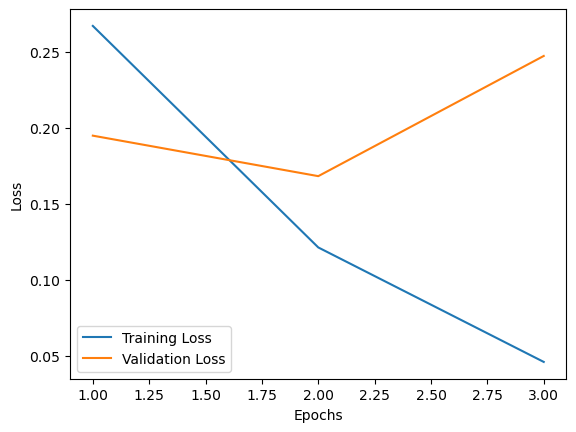

In [57]:
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
epochs = range(1, len(validation_loss) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, training_loss[:len(validation_loss)], label="Training Loss")  # Match length with validation
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [58]:
# Print or save misclassified samples after evaluation
for sample in misclassified_samples:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']}")

Index: 18, Review: I had to return it immediately when I opened the box.  On the picture it looks more blue than purple, True Label: 0, Predicted Label: 1
Index: 62, Review: So I ordered this shirt and I got an entirely diffent one, the packing slip had the right order #. The shirt I received was long sleeved, crew neck with a notch in it. Ans when I called them,the person I spoke to was not the least bit shocked/ amazed or even willing to send the right one, she just said send it back... think twice unless you don't mind making trips to the post offic, True Label: 0, Predicted Label: 1
Index: 74, Review: There's a fine line between tacky and hip, and these slippers are not it.  These slippers looked much cuter in the picture than they do in person.  Also, the only thing between your foot and the floor is a thin piece of rubber-y fabric.  They're not made for warmth.  All around disappointing, True Label: 0, Predicted Label: 1
Index: 107, Review: I used to wear lame-ass Y-fronts when I

#### 3. ALBERT
An optimized, efficient version of BERT that reduces memory usage and speeds up processing. It achieves this through parameter sharing (reusing weights across layers) and factorized embedding parameterization (using smaller embeddings to reduce memory needs). These changes make ALBERT faster and lighter while maintaining similar performance to BERT, making it ideal for resource-constrained NLP tasks.

In [70]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset  # Using Hugging Face's Dataset

# Change model_name to ALBERT
model_name = 'albert-base-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
)

def tokenize_function(examples):
    return tokenizer(examples['reviews'], padding='max_length', truncation=True, max_length=512)

train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.rename_column("sentiments", "labels")

dataset_dict = train_dataset.train_test_split(test_size=0.125, seed=42, shuffle=True)
train_dataset = dataset_dict['train']
val_dataset = dataset_dict['test']

train_dataset_tk = train_dataset.map(tokenize_function, batched=True)
val_dataset_tk = val_dataset.map(tokenize_function, batched=True)
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

training_args = TrainingArguments(
    output_dir="./results",
    logging_dir='./logs',
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Load metrics using evaluate library
from evaluate import load

accuracy_metric = load("accuracy")
f1_metric = load("f1")
precision_metric = load("precision")
recall_metric = load("recall")

# Initialize an empty list to store misclassified samples
misclassified_samples = []

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    
    error_rate = 1 - accuracy["accuracy"]
    
    # Identify misclassified samples
    global misclassified_samples
    misclassified_samples = []  # Reset for each evaluation
    
    for idx, (pred, true_label) in enumerate(zip(predictions, labels)):
        if pred != true_label:
            # Retrieve original review text from val_dataset using index
            original_review = val_dataset[idx]['reviews']
            misclassified_samples.append({
                'index': idx,
                'review': original_review,
                'true_label': true_label.item(),
                'predicted_label': pred.item()
            })
            
    # Display the count of misclassified samples
    total_samples = len(labels)  # Total number of samples in this evaluation
    print(f"Number of misclassified samples: {len(misclassified_samples)} / {total_samples} ")
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "error_rate": error_rate,
    }

from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tk,
    eval_dataset=val_dataset_tk,
    compute_metrics=compute_metrics,
)

trainer.train()

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

C:\Users\User\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--albert-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6475 [00:00<?, ? examples/s]

Map:   0%|          | 0/926 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.359100,0.416571,0.887689,0.861751,0.884853,0.887689,0.112311
2,0.335400,0.221353,0.920086,0.918529,0.917514,0.920086,0.079914
3,0.225600,0.244519,0.930886,0.928552,0.927872,0.930886,0.069114


Number of misclassified samples: 104 / 926 
Number of misclassified samples: 74 / 926 
Number of misclassified samples: 64 / 926 


TrainOutput(global_step=2430, training_loss=0.30669865235379695, metrics={'train_runtime': 1968.346, 'train_samples_per_second': 9.869, 'train_steps_per_second': 1.235, 'total_flos': 464220626688000.0, 'train_loss': 0.30669865235379695, 'epoch': 3.0})

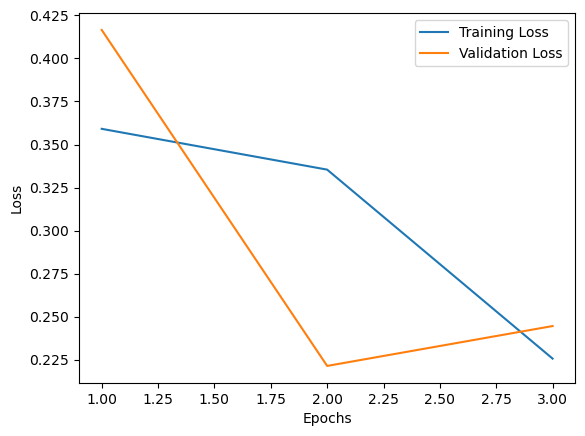

In [71]:
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
epochs = range(1, len(validation_loss) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, training_loss[:len(validation_loss)], label="Training Loss")  # Match length with validation
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [72]:
# Print or save misclassified samples after evaluation
for sample in misclassified_samples:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']}")

Index: 2, Review: Item was called "Fleese" but was 80% cotton and looked & felt like a regular sweat shirt. To return an item to them, they give you free mailing, but they will deduct $5.95 off the refund for S&H. After calling them about this, they agreed to give us a full refund. But the refund will not show up until after 2 or 3 billing cycles. I doubt that makes many consumers happy. Champion makes a fine line of products, but I will never deal with them on line agai, True Label: 0, Predicted Label: 1
Index: 4, Review: I bought this purse as a gift off an Amazon wish list.  Now that I have seen it, I want one for myself.  The purse has a lot of detail and looks expensive.  Very unusual.  The person I bought it for collects and knows purses well.  She immediately empied out the purse she was carrying and put her stuff in this one, True Label: 1, Predicted Label: 0
Index: 18, Review: I had to return it immediately when I opened the box.  On the picture it looks more blue than purple,

#### 4. ELECTRA

ELECTRA is an efficient NLP model that improves upon BERT by using a different pre-training approach called Replaced Token Detection. Instead of masking words and predicting them, ELECTRA replaces some words with incorrect ones and trains the model to identify these "fake" tokens. This method is more computationally efficient and allows ELECTRA to learn faster with less data. As a result, ELECTRA achieves high accuracy on NLP tasks with smaller models and less training time, making it highly effective for resource-constrained applications.

In [2]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset  # Using Hugging Face's Dataset

# Change model_name to ELECTRA
model_name = 'google/electra-base-discriminator'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
)

def tokenize_function(examples):
    return tokenizer(examples['reviews'], padding='max_length', truncation=True, max_length=512)

train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.rename_column("sentiments", "labels")

dataset_dict = train_dataset.train_test_split(test_size=0.125, seed=42, shuffle=True)
train_dataset = dataset_dict['train']
val_dataset = dataset_dict['test']

train_dataset_tk = train_dataset.map(tokenize_function, batched=True)
val_dataset_tk = val_dataset.map(tokenize_function, batched=True)
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

training_args = TrainingArguments(
    output_dir="./results",
    logging_dir='./logs',
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# Load metrics using evaluate library
from evaluate import load

accuracy_metric = load("accuracy")
f1_metric = load("f1")
precision_metric = load("precision")
recall_metric = load("recall")

# Initialize an empty list to store misclassified samples
misclassified_samples = []

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    
    error_rate = 1 - accuracy["accuracy"]
    
    # Identify misclassified samples
    global misclassified_samples
    misclassified_samples = []  # Reset for each evaluation
    
    for idx, (pred, true_label) in enumerate(zip(predictions, labels)):
        if pred != true_label:
            # Retrieve original review text from val_dataset using index
            original_review = val_dataset[idx]['reviews']
            misclassified_samples.append({
                'index': idx,
                'review': original_review,
                'true_label': true_label.item(),
                'predicted_label': pred.item()
            })
            
    # Display the count of misclassified samples
    total_samples = len(labels)  # Total number of samples in this evaluation
    print(f"Number of misclassified samples: {len(misclassified_samples)} / {total_samples} ")
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "error_rate": error_rate,
    }

from transformers import Trainer, EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tk,
    eval_dataset=val_dataset_tk,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6475 [00:00<?, ? examples/s]

Map:   0%|          | 0/926 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.222600,0.126343,0.960043,0.960343,0.960743,0.960043,0.039957
2,0.114400,0.138234,0.960043,0.959056,0.959081,0.960043,0.039957
3,0.044800,0.194715,0.957883,0.956224,0.957055,0.957883,0.042117


Number of misclassified samples: 37 / 926 
Number of misclassified samples: 37 / 926 
Number of misclassified samples: 39 / 926 


TrainOutput(global_step=2430, training_loss=0.12725481260951163, metrics={'train_runtime': 5738.063, 'train_samples_per_second': 3.385, 'train_steps_per_second': 0.423, 'total_flos': 5110932250368000.0, 'train_loss': 0.12725481260951163, 'epoch': 3.0})

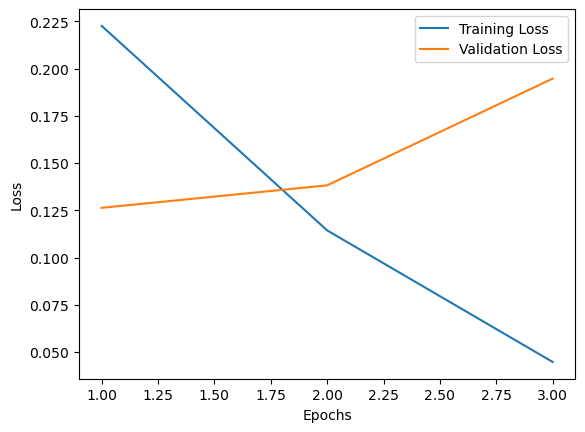

In [3]:
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
epochs = range(1, len(validation_loss) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, training_loss[:len(validation_loss)], label="Training Loss")  # Match length with validation
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [4]:
# Print or save misclassified samples after evaluation
for sample in misclassified_samples:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']}")

Index: 23, Review: Just too small for wat i needed it for had to went and get something else bigger to use., True Label: 0, Predicted Label: 1
Index: 46, Review: The shoes looked wide in front but upon trying out, my toes are squashed and it can be quite uncomfortable. Nontheless, the heels are nice and presentable. Can only be worn for a short time, True Label: 0, Predicted Label: 1
Index: 62, Review: So I ordered this shirt and I got an entirely diffent one, the packing slip had the right order #. The shirt I received was long sleeved, crew neck with a notch in it. Ans when I called them,the person I spoke to was not the least bit shocked/ amazed or even willing to send the right one, she just said send it back... think twice unless you don't mind making trips to the post offic, True Label: 0, Predicted Label: 1
Index: 80, Review: The socks were nice but cost too much .  Price a little unreasonable, True Label: 1, Predicted Label: 0
Index: 107, Review: I used to wear lame-ass Y-front

### Hyperparameter Optimization for Model (BERT)

#### Optuna
An open-source tool for hyperparameter optimization framework for automating hyperparameter search. 

In [48]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [52]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset  # Using Hugging Face's Dataset
from evaluate import load
from transformers import EarlyStoppingCallback

# Model and tokenizer setup
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define a function to initialize the model
def model_init(trial=None):
    if trial is not None:
        dropout = trial.suggest_float("dropout", 0.1, 0.3, step=0.05)
        attention_probs_dropout_prob = trial.suggest_float("attention_probs_dropout_prob", 0.1, 0.3, step=0.05)
    else:
        dropout = 0.1
        attention_probs_dropout_prob = 0.1

    return AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=2,
        hidden_dropout_prob=dropout,
        attention_probs_dropout_prob=attention_probs_dropout_prob
    )

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['reviews'], padding='max_length', truncation=True, max_length=512)

# Load datasets
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Rename target column to "labels" for Trainer compatibility
train_dataset = train_dataset.rename_column("sentiments", "labels")

# Split the train dataset for training and validation
dataset_dict = train_dataset.train_test_split(test_size=0.125, seed=42, shuffle=True)
train_dataset = dataset_dict['train']
val_dataset = dataset_dict['test']

# Tokenize datasets
train_dataset_tk = train_dataset.map(tokenize_function, batched=True)
val_dataset_tk = val_dataset.map(tokenize_function, batched=True)
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

# Load evaluation metrics
accuracy_metric = load("accuracy")
f1_metric = load("f1")
precision_metric = load("precision")
recall_metric = load("recall")

# Metrics computation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    
    error_rate = 1 - accuracy["accuracy"]
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "error_rate": error_rate,
    }

# Define the search space for Optuna
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "weight_decay": trial.suggest_loguniform("weight_decay", 0.01, 0.3),
        "warmup_steps": trial.suggest_int("warmup_steps", 0, 300),
        "dropout": trial.suggest_float("dropout", 0.1, 0.3, step=0.05),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 2, 5),
        "early_stopping_patience": trial.suggest_int("early_stopping_patience", 1, 5),
        "seed": trial.suggest_int("seed", 1, 100)
    }

# Run hyperparameter search using Optuna
best_trial = Trainer(
    model_init=model_init,  # Pass model_init directly
    args=TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        logging_dir="./logs",
        load_best_model_at_end=True
    ),
    train_dataset=train_dataset_tk,
    eval_dataset=val_dataset_tk,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
).hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=10
)

# Print the best hyperparameters found by Optuna
print(f"Best trial: {best_trial}")

Map:   0%|          | 0/6475 [00:00<?, ? examples/s]

Map:   0%|          | 0/926 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

C:\Users\User\anaconda3\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
[I 2024-11-14 08:07:55,829] A new study created in memory with name: no-name-239c63b6-a5e0-4cba-99b4-f835d238247c
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppD

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,No log,0.139200,0.954644,0.953279,0.953371,0.954644,0.045356
2,0.308100,0.130650,0.965443,0.965227,0.965079,0.965443,0.034557
3,0.131700,0.146268,0.964363,0.963607,0.963614,0.964363,0.035637


[I 2024-11-14 10:24:43,097] Trial 0 finished with value: 3.8915833360531296 and parameters: {'learning_rate': 1.1190933390991854e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.011648425075682976, 'warmup_steps': 244, 'dropout': 0.25, 'num_train_epochs': 3, 'early_stopping_patience': 3, 'seed': 95, 'attention_probs_dropout_prob': 0.15000000000000002}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.297700,0.203980,0.951404,0.951478,0.951556,0.951404,0.048596
2,0.135400,0.175635,0.953564,0.952578,0.952327,0.953564,0.046436
3,0.075700,0.218620,0.957883,0.956692,0.956808,0.957883,0.042117


[I 2024-11-14 10:50:15,854] Trial 1 finished with value: 3.871383805120419 and parameters: {'learning_rate': 4.5859715968257184e-05, 'per_device_train_batch_size': 8, 'weight_decay': 0.023787197678675463, 'warmup_steps': 83, 'dropout': 0.1, 'num_train_epochs': 3, 'early_stopping_patience': 5, 'seed': 31, 'attention_probs_dropout_prob': 0.25}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,No log,0.109267,0.960043,0.959599,0.959366,0.960043,0.039957
2,0.248600,0.160924,0.955724,0.955517,0.955347,0.955724,0.044276


[I 2024-11-14 12:39:09,814] Trial 2 finished with value: 3.866587224003297 and parameters: {'learning_rate': 2.3364383698519387e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.061787772006814644, 'warmup_steps': 75, 'dropout': 0.3, 'num_train_epochs': 5, 'early_stopping_patience': 4, 'seed': 100, 'attention_probs_dropout_prob': 0.1}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=Tru

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.380200,0.183452,0.954644,0.953112,0.953403,0.954644,0.045356
2,0.160300,0.161449,0.957883,0.958075,0.958302,0.957883,0.042117
3,0.117000,0.154697,0.962203,0.962026,0.961888,0.962203,0.037797
4,0.072100,0.197922,0.961123,0.960627,0.960409,0.961123,0.038877


[I 2024-11-14 13:13:08,122] Trial 3 finished with value: 3.882159107232749 and parameters: {'learning_rate': 1.0731183527946881e-05, 'per_device_train_batch_size': 8, 'weight_decay': 0.019696866497168446, 'warmup_steps': 273, 'dropout': 0.2, 'num_train_epochs': 5, 'early_stopping_patience': 4, 'seed': 78, 'attention_probs_dropout_prob': 0.2}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.261500,0.153407,0.957883,0.956692,0.956808,0.957883,0.042117
2,0.126300,0.147531,0.962203,0.962261,0.962323,0.962203,0.037797
3,0.076200,0.200225,0.960043,0.959056,0.959081,0.960043,0.039957


[I 2024-11-14 13:38:41,239] Trial 4 finished with value: 3.8781796965224875 and parameters: {'learning_rate': 1.2593128142293683e-05, 'per_device_train_batch_size': 8, 'weight_decay': 0.15976046017995355, 'warmup_steps': 113, 'dropout': 0.1, 'num_train_epochs': 4, 'early_stopping_patience': 5, 'seed': 80, 'attention_probs_dropout_prob': 0.3}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,No log,0.147294,0.944924,0.947081,0.952111,0.944924,0.055076


[I 2024-11-14 14:01:26,486] Trial 5 pruned. 
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 0.01, 0.3),
Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
Trying to set early_stopping_patience in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
Some weights of BertForSeque

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,No log,0.144490,0.954644,0.953112,0.953403,0.954644,0.045356


[I 2024-11-14 14:58:35,898] Trial 6 pruned. 
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "weight_decay": trial.suggest_loguniform("weight_decay", 0.01, 0.3),
Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
Trying to set early_stopping_patience in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
Some weights of BertForSeque

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.369300,0.151956,0.960043,0.960104,0.960169,0.960043,0.039957
2,0.188700,0.183102,0.956803,0.956253,0.955975,0.956803,0.043197


[I 2024-11-14 15:15:34,288] Trial 7 finished with value: 3.869030635278227 and parameters: {'learning_rate': 1.0262531271687771e-05, 'per_device_train_batch_size': 8, 'weight_decay': 0.1502508252849426, 'warmup_steps': 245, 'dropout': 0.3, 'num_train_epochs': 5, 'early_stopping_patience': 2, 'seed': 56, 'attention_probs_dropout_prob': 0.1}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) 

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,No log,0.122083,0.957883,0.957687,0.957527,0.957883,0.042117
2,0.235600,0.146594,0.961123,0.960498,0.960310,0.961123,0.038877


[I 2024-11-14 16:33:17,776] Trial 8 finished with value: 3.8819307761425303 and parameters: {'learning_rate': 1.0952291455208048e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.03954952394788021, 'warmup_steps': 73, 'dropout': 0.25, 'num_train_epochs': 3, 'early_stopping_patience': 3, 'seed': 74, 'attention_probs_dropout_prob': 0.1}. Best is trial 0 with value: 3.8915833360531296.
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 5e-5),
C:\Users\User\AppData\Local\Temp\ipykernel_12216\1609847849.py:86: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=Tru

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.278500,0.209904,0.951404,0.949673,0.949938,0.951404,0.048596


[I 2024-11-14 16:41:46,242] Trial 9 pruned. 


Best trial: BestRun(run_id='0', objective=3.8915833360531296, hyperparameters={'learning_rate': 1.1190933390991854e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.011648425075682976, 'warmup_steps': 244, 'dropout': 0.25, 'num_train_epochs': 3, 'early_stopping_patience': 3, 'seed': 95, 'attention_probs_dropout_prob': 0.15000000000000002}, run_summary=None)


### Predictive BERT Model with Best Optimisation
Chosen BERT Model as predictive model with the following optismation:
'learning_rate': 1.1190933390991854e-05, 'per_device_train_batch_size': 16, 'weight_decay': 0.011648425075682976, 'warmup_steps': 244, 'dropout': 0.25, 'num_train_epochs': 2 (2 because the validation loss is higher for 3 than 2), 'early_stopping_patience': 3, 'seed': 95, 'attention_probs_dropout_prob': 0.15000000000000002} based on OPTUNA

#### Predictive BERT Model

In [61]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset  # Using Hugging Face's Dataset

In [63]:
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [65]:
# Set up the BERT model with dropout configuration
from transformers import BertConfig

config = BertConfig.from_pretrained(
    model_name,
    num_labels=2,
    hidden_dropout_prob=0.25,
    attention_probs_dropout_prob=0.15
)

In [67]:
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    config=config,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [69]:
def tokenize_function(examples):
    return tokenizer(examples['reviews'], padding='max_length', truncation=True, max_length=512)

In [71]:
train_df = pd.read_json('train.json')
test_df = pd.read_json('test.json')

In [73]:
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [75]:
train_dataset = train_dataset.rename_column("sentiments", "labels")

In [77]:
train_dataset

Dataset({
    features: ['reviews', 'labels'],
    num_rows: 7401
})

In [79]:
dataset_dict = train_dataset.train_test_split(test_size=0.125, seed=42, shuffle = True)
train_dataset = dataset_dict['train']
val_dataset = dataset_dict['test']

In [81]:
train_dataset_tk = train_dataset.map(tokenize_function, batched=True) #.map is used in data processing to apply a specified function to each element in a dataset or collection
val_dataset_tk = val_dataset.map(tokenize_function, batched=True)
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/6475 [00:00<?, ? examples/s]

Map:   0%|          | 0/926 [00:00<?, ? examples/s]

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

In [83]:
training_args = TrainingArguments(
    output_dir="./results",
    logging_dir='./logs',
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    learning_rate=1.1190933390991854e-05,
    per_device_train_batch_size=16,
    weight_decay=0.011648425075682976,
    warmup_steps=244,
    num_train_epochs=3,
    seed=95,
)

In [85]:
# Load metrics using evaluate library
from evaluate import load

accuracy_metric = load("accuracy")
f1_metric = load("f1")
precision_metric = load("precision")
recall_metric = load("recall")

# Initialize an empty list to store misclassified samples
misclassified_samples = []

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")
    
    error_rate = 1 - accuracy["accuracy"]
    
    # Identify misclassified samples
    global misclassified_samples
    misclassified_samples = []  # Reset for each evaluation
    
    for idx, (pred, true_label) in enumerate(zip(predictions, labels)):
        if pred != true_label:
            # Retrieve original review text from val_dataset using index
            original_review = val_dataset[idx]['reviews']
            misclassified_samples.append({
                'index': idx,
                'review': original_review,
                'true_label': true_label.item(),
                'predicted_label': pred.item()
            })
            
    # Display the count of misclassified samples
    total_samples = len(labels)  # Total number of samples in this evaluation
    print(f"Number of misclassified samples: {len(misclassified_samples)} / {total_samples} ")
    
    return {
        "accuracy": accuracy["accuracy"],
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
        "error_rate": error_rate,
    }

In [87]:
from transformers import EarlyStoppingCallback

# Initialize Trainer with early stopping callback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tk,
    eval_dataset=val_dataset_tk,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)] #it wont early stop as there is only 3 epochs
)

In [89]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall,Error Rate
1,0.344700,0.125961,0.956803,0.955812,0.955686,0.956803,0.043197
2,0.148500,0.133884,0.962203,0.961906,0.961716,0.962203,0.037797
3,0.110000,0.143902,0.964363,0.963849,0.963692,0.964363,0.035637


Number of misclassified samples: 40 / 926 
Number of misclassified samples: 35 / 926 
Number of misclassified samples: 33 / 926 


TrainOutput(global_step=1215, training_loss=0.2010676945187918, metrics={'train_runtime': 7257.8229, 'train_samples_per_second': 2.676, 'train_steps_per_second': 0.167, 'total_flos': 5110932250368000.0, 'train_loss': 0.2010676945187918, 'epoch': 3.0})

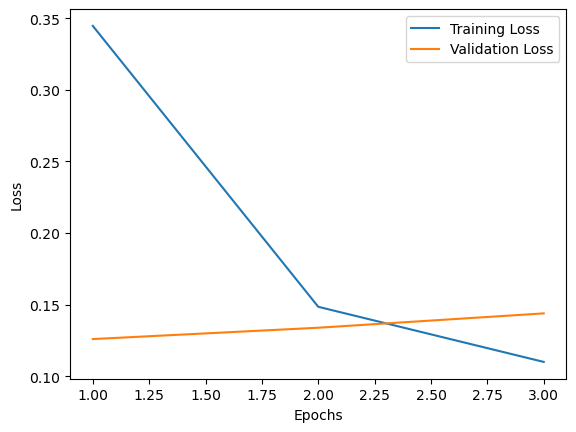

In [90]:
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log and 'epoch' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
epochs = range(1, len(validation_loss) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, training_loss[:len(validation_loss)], label="Training Loss")  # Match length with validation
plt.plot(epochs, validation_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [91]:
# Print or save misclassified samples after evaluation
for sample in misclassified_samples:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']}")

Index: 80, Review: The socks were nice but cost too much .  Price a little unreasonable, True Label: 1, Predicted Label: 0
Index: 99, Review: I am pleased with the quality of the pants, but was disappointed that they did not have cuffs. The Web site indicated that pants through waist size 44 had cuffs. I ordered size 44, but the pants did not have cuffs, True Label: 1, Predicted Label: 0
Index: 107, Review: I used to wear lame-ass Y-fronts when I was a kid and my boring folks did all the shopping. I made the switch to thongs after I got a girlfriend and she made it clear that I had to ditch the grandpa undies. So I did, and gladly! There's no way I could go back to this 'maxi' sh*t anymore. I tried one of my old pairs a few months ago and they look freakin HUGE!! I'm talking fat-guy big. You don't realize how big they are until you try modern stuff. So here's my advice: if you're still putting up with either boxers or briefs throw them in the trash right now and go buy something smalle

#### ERROR Analysis: Analysis of False Positive & False Negatives

In [110]:
# Initialize counters for False Positives and False Negatives
false_positives = 0
false_negatives = 0

# Iterate over misclassified samples to count FP and FN
for sample in misclassified_samples:
    true_label = sample['true_label']
    predicted_label = sample['predicted_label']

    # Check for False Positive: Predicted Positive, True Negative
    if predicted_label == 1 and true_label == 0:
        false_positives += 1

    # Check for False Negative: Predicted Negative, True Positive
    if predicted_label == 0 and true_label == 1:
        false_negatives += 1

# Print the results
print(f"False Positives (FP): {false_positives}")
print(f"False Negatives (FN): {false_negatives}")

False Positives (FP): 21
False Negatives (FN): 12


In [112]:
from collections import Counter
# Assuming train_dataset['labels'] is a list of labels
label_counts = Counter(train_dataset['labels'])
# Print the counts for each label
print(f"Number of 0s: {label_counts[0]}")
print(f"Number of 1s: {label_counts[1]}")

Number of 0s: 947
Number of 1s: 5528


### Observations:
- Model Bias Towards Positive Sentiment Since we have more False Positives (21) than False Negatives (12), this suggests that out model might be slightly biased towards predicting positive sentiment. By counting the number of 1 (positive sentiment) and 0 (negative sentiment) in the training dataset, it also shows that the training data is skewed more towards positive sentiment. This also explains why the model is slightly biased towards positive sentiment. Hence, it is more likely to incorrectly classify a negative review as positive than to misclassify a positive review as negative.
- Potential Impact on Precision and Recall Precision for the positive class will be affected by the higher number of False Positives. Precision measures how many of the reviews predicted as positive are actually positive. Since there are many FPs, precision may be lower.

      Precision = True Positives / (True Positives+False Positives)

#### ERROR Analysis: Analysis of Number of Short Reviews

In [114]:
short_reviews = []
# Iterate over misclassified samples
for sample in misclassified_samples:
    review_length = len(sample['review'].split())  # Count number of words in the review
    # Consider reviews shorter than a certain threshold (e.g., 40 words)
    if review_length < 40:
        short_reviews.append(sample)

print(f"Short Reviews Misclassified: {len(short_reviews)}")
for error in short_reviews:
    print(f"Review Length: {len(error['review'].split())}, Review: {error['review']}")

Short Reviews Misclassified: 10
Review Length: 13, Review: The socks were nice but cost too much .  Price a little unreasonable
Review Length: 33, Review: I ordered this items in size xx-large for my 20 months doughter and there are huge. Maybe will fit when she will be 4 or 5, although she looks normaly for her age
Review Length: 15, Review: The heel part is little bit high. Thus, it is not comfortable at the beginning.
Review Length: 29, Review: This review isn't really about the flip-flops, because theyre great. Why would you buy them here for $5.61 when you can get them at the store for $2.50 each?
Review Length: 31, Review: I am solidly a size medium, but I was swimming in this jacket.  I think it is more of an XL.  I'd say the medium is for someone 5'10" and 250lbs
Review Length: 30, Review: The shoes are true to size and very comfortable. But only 3 months after purchase the sole and the upper leather are starting to seperate. 
Really expected a better quality.
Review Length: 19

### Observation:
- Shorter Reviews Lack Context
Short reviews, especially those under 20 words, may not provide enough information for the model to make an accurate prediction. Such reviews tend to be vague and lack context, confusing the model.

- Mixture of positive and negative sentiments
Most of the short reviews contain both positive and negative sentiment. For example "The socks were nice but cost too much . Price a little unreasonable". this review contain positive and negative words such as "nice" and "unreasonable". The brevity of the review makes it difficult for the model to determine which sentiment dominates.

#### ERROR Analysis: Misclassification by Themes - Sizing issues, Customer Service Issues

In [129]:
size_issues = []
customer_service_issues = []

# Iterate over misclassified samples
for sample in misclassified_samples:
    review = sample['review'].lower()
    
# Check for size-related keywords
    if any(word in review for word in ["size", "fit", "too big", "too small"]):
        size_issues.append(sample)
        
# Check for customer service-related keywords
    if any(word in review for word in ["customer service", "return", "refund"]):
        customer_service_issues.append(sample)
    
print(f"Size Issues Misclassified: {len(size_issues)}")
print(f"Customer Service Issues Misclassified: {len(customer_service_issues)}")

Size Issues Misclassified: 10
Customer Service Issues Misclassified: 4


In [131]:
# Print size-related misclassified reviews
print(f"Size Issues Misclassified: {len(size_issues)}")
for sample in size_issues:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']} \n")
    #print("-" * 50)  # Separator for readability

# Print customer service-related misclassified reviews
print(f"\n\n Customer Service Issues Misclassified: {len(customer_service_issues)}")
for sample in customer_service_issues:
    print(f"Index: {sample['index']}, Review: {sample['review']}, True Label: {sample['true_label']}, Predicted Label: {sample['predicted_label']}\n")
    #print("-" * 50)  # Separator for readability

Size Issues Misclassified: 10
Index: 99, Review: I am pleased with the quality of the pants, but was disappointed that they did not have cuffs. The Web site indicated that pants through waist size 44 had cuffs. I ordered size 44, but the pants did not have cuffs, True Label: 1, Predicted Label: 0 

Index: 135, Review: I purchased a bathing suit using the sizing chart that the seller provided and it proved to be very inaccurate.  I purchased a size small based on the chart and it doesn't come close to fitting.  The suit is not exchangeable (since it is sold by a California merchant).  Now I am out of pocket and the suit does not fit.  I do not recommend this merchant to others, True Label: 1, Predicted Label: 0 

Index: 244, Review: I ordered this items in size xx-large for my 20 months doughter and there are huge. Maybe will fit when she will be 4 or 5, although she looks normaly for her age, True Label: 0, Predicted Label: 1 

Index: 297, Review: I received the boots and found them to

### Observation:
Despite many of the reviews being negative, the model has misclassifed them. which supports the claim that the model tends to be more postively-biased when encountering mixed sentiment reviews. It may also indicate that the model has trouble analysing thematic reviews such as size-related and customer service-related complaints.

### Overview (Error Analysis):
The error analysis of the sentiment classification model reveals several key findings. The model shows a bias towards predicting positive sentiment, as evidenced by more False Positives (21) than False Negatives (12), likely due to an imbalance in the training data skewed towards positive reviews. This bias affects the model’s precision for positive sentiment, as it tends to misclassify negative reviews as positive. Additionally, the model struggles with shorter reviews, which often lack context and contain mixed sentiments, making it difficult to determine the dominant sentiment. Reviews related to size and customer service issues are frequently misclassified, suggesting that the model has trouble identifying negative sentiments in thematic complaints. These findings indicate that the model could benefit from better handling of mixed sentiments, domain-specific features for size and customer service issues, and addressing data imbalance to reduce its positive bias.

### Prediction of Test Dataset

In [141]:
test_df = pd.read_json('test.json')

In [145]:
test_df

,reviews
0,I bought 2 sleepers. sleeper had holes in the...
1,I dare say these are just about the sexiest th...
2,"everything about the transaction (price, deliv..."
3,"Not bad for just a shirt. Very durable, and m..."
4,These are truly wrinkle free and longer than t...
...,...
1846,These are stylish and nice and perfect to wear...
1847,We bought these long-sleeved colored shirts fo...
1848,These are really cute and very sexy. They wil...
1849,These shoers were for my daughter. She loves ...


In [147]:
test_dataset = Dataset.from_pandas(test_df)

In [149]:
test_dataset

Dataset({
    features: ['reviews'],
    num_rows: 1851
})

In [151]:
test_dataset_tk = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1851 [00:00<?, ? examples/s]

In [153]:
test_dataset_tk

Dataset({
    features: ['reviews', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 1851
})

In [159]:
import torch

# Run predictions
predictions = trainer.predict(test_dataset_tk)

# Convert predictions to tensor and apply argmax
predicted_labels = torch.argmax(torch.tensor(predictions.predictions), axis=1)

# Update the DataFrame with predicted labels
test_df['predicted_sentiments'] = predicted_labels.numpy()
print(test_df[['reviews', 'predicted_sentiments']])

                                                reviews  predicted_sentiments
0     I bought 2 sleepers.  sleeper had holes in the...                     0
1     I dare say these are just about the sexiest th...                     1
2     everything about the transaction (price, deliv...                     1
3     Not bad for just a shirt.  Very durable, and m...                     1
4     These are truly wrinkle free and longer than t...                     1
...                                                 ...                   ...
1846  These are stylish and nice and perfect to wear...                     1
1847  We bought these long-sleeved colored shirts fo...                     1
1848  These are really cute and very sexy.  They wil...                     1
1849  These shoers were for my daughter.  She loves ...                     1
1850  Most umbrellas handle a light rain well, but l...                     1

[1851 rows x 2 columns]


In [161]:
test_df.to_csv("submission.csv", index=False)